# Concentrations moyennes annuelles de polluants en Centre-Val-de-Loire et analyse orientée sur les personnes souffrant d'asthme

## Source des informations

La loi sur l’air et l’utilisation rationnelle de l’énergie du 30 décembre 1996 reconnaît à chacun le droit de respirer un air qui ne nuise pas à sa santé. Cette loi prévoit une surveillance de la qualité de l'air sur l'ensemble du territoire depuis l’an 2000.

L'Etat confie cette surveillance à des organismes agréés par le Ministère chargé de l'Environnement.  

Lig'Air est une association régionale du type loi de 1901 créée le 27 Novembre 1996 pour assurer la surveillance de la qualité de l’air en région Centre-Val de Loire.  

## Intentions

Nous nous sommes intéressés aux problématiques liées aux maladies respiratoires. La question principale : quelle serait la meilleure ville de la région Centre-Val-de-Loire où s'installer pour limiter au maximum l'impact sur la santé de personnes souffrant d'asthme ?

## Quelques définitions

NO2 : Le dioxyde d'azote fait partie d'un groupe de polluants atmosphériques gazeux produits par la circulation routière et d'autres processus de combustion de combustibles fossiles. Moyenne annuelle : 40 µg/m³

SO2 : Le dioxyde de soufre (SO2), un gaz toxique incolore et malodorant, émis par la combustion de combustibles fossiles - charbon, pétrole et diesel - ou d'autres matériaux contenant du sulfure. Moyenne journalière : 20 µg/m³



O3 : L'ozone se forme lorsque les polluants émis par les voitures, les centrales électriques, les chaudières industrielles, les raffineries, les usines chimiques et d'autres sources réagissent chimiquement en présence de la lumière du soleil. Moyenne annuelle : 30 µg/m³

PM10/PM25 : Fait référence à des particules atmosphériques (PM) qui ont un diamètre inférieur à 1 / 2,5 micromètres, soit environ 3% du diamètre d'un cheveu humain qui peuvent atteindre les voies respiratoires. Moyennes pour les PM25 : 10 µg/m³ en moy. par an et 25 µg/m³ en moy. par jour. Pour les PM10 : 20 µg/m³ en moy. par an et µg/m³ en moy. par jour

# Présentation du set de data

In [1]:
import pandas as pd

url = "https://opendata.arcgis.com/datasets/6f64bbd4f94c425791c2ec7eee33bb71_0.csv"
df = pd.read_csv(url)

df.head(5)

,X,Y,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,couleur,x_wgs84,y_wgs84,ObjectId
0,1.903984,47.903174,2019/01/02 00:00:00+00,3,Bon,Lig'Air,EPCI,244500468,ORLEANS,1,1,3,3,0,#0AD857,1.903984,47.903174,1
1,0.682860,47.394438,2018/10/14 00:00:00+00,4,Bon,Lig'Air,EPCI,243700754,TOURS,2,1,4,2,0,#A2F743,0.682860,47.394438,2
2,2.396232,47.079706,2019/01/02 00:00:00+00,3,Bon,Lig'Air,EPCI,241800507,BOURGES,2,1,3,3,0,#0AD857,2.396232,47.079706,3
3,1.490599,48.445544,2018/10/20 00:00:00+00,5,Moyen,Lig'Air,EPCI,200033181,CHARTRES,2,1,3,5,0,#FFFF00,1.490599,48.445544,4
4,1.696049,46.810434,2018/10/20 00:00:00+00,5,Moyen,Lig'Air,EPCI,243600327,CHATEAUROUX,1,1,4,5,0,#FFFF00,1.696049,46.810434,5


## Composition du dataframe

In [2]:
print(df.shape)
print(df.size)

(8152, 18)
146736


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8152 entries, 0 to 8151
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          8152 non-null   float64
 1   Y          8152 non-null   float64
 2   date_ech   8152 non-null   object 
 3   valeur     8152 non-null   int64  
 4   qualif     8152 non-null   object 
 5   source     8152 non-null   object 
 6   type_zone  8152 non-null   object 
 7   code_zone  8152 non-null   int64  
 8   lib_zone   8152 non-null   object 
 9   val_no2    8152 non-null   int64  
 10  val_so2    8152 non-null   int64  
 11  val_o3     8152 non-null   int64  
 12  val_pm10   8152 non-null   int64  
 13  val_pm25   8152 non-null   int64  
 14  couleur    8152 non-null   object 
 15  x_wgs84    8152 non-null   float64
 16  y_wgs84    8152 non-null   float64
 17  ObjectId   8152 non-null   int64  
dtypes: float64(4), int64(8), object(6)
memory usage: 1.1+ MB


In [4]:
df.isna().sum()

X            0
Y            0
date_ech     0
valeur       0
qualif       0
source       0
type_zone    0
code_zone    0
lib_zone     0
val_no2      0
val_so2      0
val_o3       0
val_pm10     0
val_pm25     0
couleur      0
x_wgs84      0
y_wgs84      0
ObjectId     0
dtype: int64

# Nettoyage des données

Après analyse du contenu des colonnes, nous avons décidé de supprimer trois colonnes qui selon nous nous semblaient redondantes ou inutiles.
- La colonne d'index 5 --> Elle notait la source des informations de la ligne. Hors, toutes les informations viennent de Lig'Air
- La colonne d'index 6 --> Type de structure administrative, toutes les données similaires
- La colonne d'index 14 --> Correspondait à la couleur sur la carte liée aux données sur le site
- La colonne d'index 15 --> Latitudes similaires à x
- La colonne d'index 16 --> Longitudes similaires à y
- La colonne d'index 17 --> Elle sert à donner un identifiant à chaque ligne. Nous ne nous en servirons pas ici

In [5]:
df.drop(df.columns[[5, 6, 14, 15, 16, 17]], axis='columns')

,X,Y,date_ech,valeur,qualif,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25
0,1.903984,47.903174,2019/01/02 00:00:00+00,3,Bon,244500468,ORLEANS,1,1,3,3,0
1,0.682860,47.394438,2018/10/14 00:00:00+00,4,Bon,243700754,TOURS,2,1,4,2,0
2,2.396232,47.079706,2019/01/02 00:00:00+00,3,Bon,241800507,BOURGES,2,1,3,3,0
3,1.490599,48.445544,2018/10/20 00:00:00+00,5,Moyen,200033181,CHARTRES,2,1,3,5,0
4,1.696049,46.810434,2018/10/20 00:00:00+00,5,Moyen,243600327,CHATEAUROUX,1,1,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8147,1.490599,48.445544,2018/09/04 00:00:00+00,3,Bon,200033181,CHARTRES,1,1,3,3,0
8148,1.696049,46.810434,2018/09/04 00:00:00+00,5,Moyen,243600327,CHATEAUROUX,1,1,5,3,0
8149,1.322670,47.590341,2018/09/04 00:00:00+00,5,Moyen,200030385,BLOIS,1,1,5,3,0
8150,1.359952,48.748753,2018/09/04 00:00:00+00,3,Bon,200040277,DREUX,1,1,3,3,0


# Analyses globales

In [6]:
listPolluants = ['val_no2','val_so2','val_pm10','val_pm25','val_o3']

data=df.groupby('lib_zone')[listPolluants].agg(['min', 'max', 'mean'])

data = data.round(decimals=2)

data = data.reset_index()

data

lib_zone val_no2           val_so2          val_pm10           val_pm25  \
                   min max  mean     min max mean      min max  mean      min   
0        BLOIS       0   4  1.24       0   1  1.0        0   8  2.53        0   
1      BOURGES       0   5  1.30       0   1  1.0        0   7  2.50        0   
2     CHARTRES       0   4  0.46       0   1  1.0        0   8  2.66        0   
3  CHATEAUROUX       0   4  1.23       0   1  1.0        0   7  2.58        0   
4        DREUX       0   4  1.29       0   1  1.0        0   8  2.53        0   
5    MONTARGIS       0   4  1.28       0   1  1.0        0   8  2.18        0   
6      ORLEANS       0   4  1.22       0   1  1.0        0   8  2.26        0   
7        TOURS       0   5  1.47       0   1  1.0        0   8  2.79        0   

           val_o3            
  max mean    min max  mean  
0   0    0      0   7  3.72  
1   0    0      0   8  3.60  
2   0    0      0   8  3.64  
3   0    0      0   8  3.68  
4   0    0      0   9  3.61  
5   0    0      0   8  3.80  
6   0    0      0   7  3.72  
7   0    0      0   7  3.68

Text(0, 0.5, 'Concentration en µg/m³')

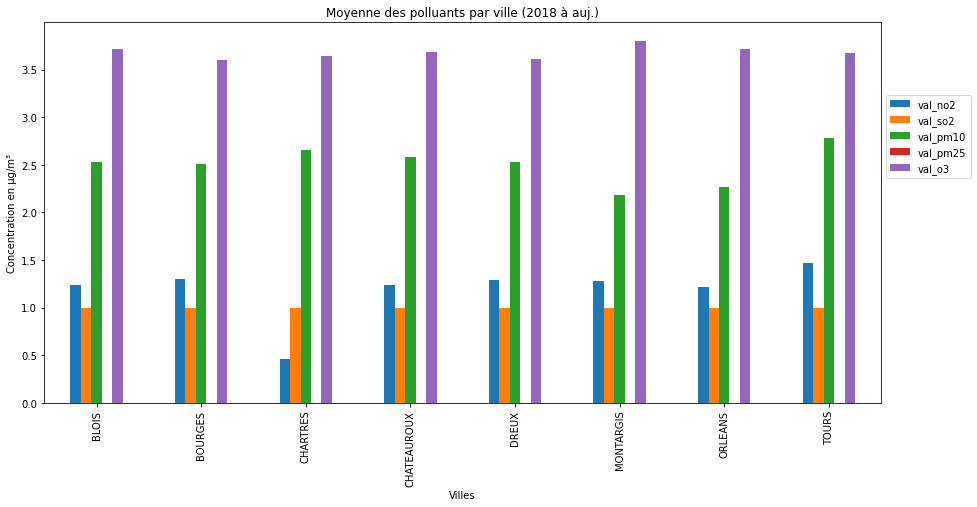

In [7]:
import matplotlib.pyplot as plt

listPolluants = ['val_no2','val_so2','val_pm10','val_pm25','val_o3']

dataMean=df.groupby('lib_zone')[listPolluants].mean()

dataMean = dataMean.reset_index()

dataMean.plot(kind = 'bar', x="lib_zone", figsize=(15,7), title = 'Moyenne des polluants par ville (2018 à auj.)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.7))
axes = plt.gca()
axes.set_xlabel('Villes')
axes.set_ylabel('Concentration en µg/m³')

## Quelques variations

Text(0, 0.5, 'Concentration en µg/m³')

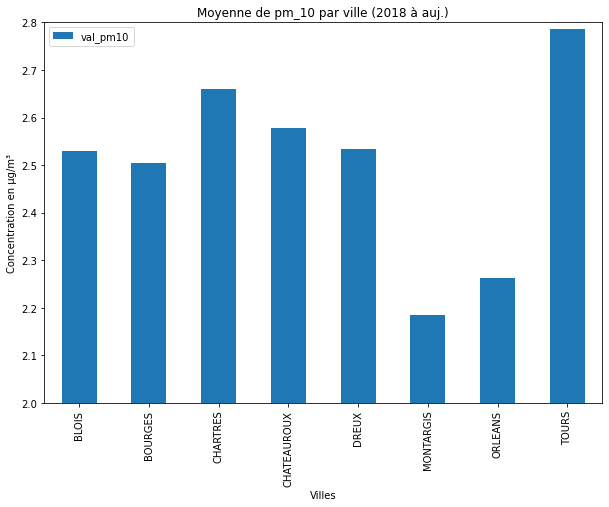

In [8]:
dataPm10 = pd.DataFrame(dataMean,columns=['lib_zone','val_pm10'])
dataPm10
dataPm10.plot(kind = 'bar', x="lib_zone", figsize=(10,7), title = 'Moyenne de pm_10 par ville (2018 à auj.)', ylim=(2,2.8));
axes = plt.gca()
axes.set_xlabel('Villes')
axes.set_ylabel('Concentration en µg/m³')

Text(0, 0.5, 'Concentration en µg/m³')

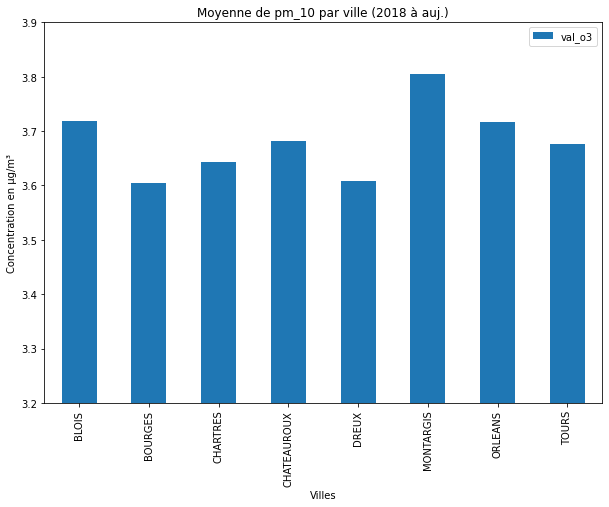

In [9]:
dataO3 = pd.DataFrame(dataMean,columns=['lib_zone','val_o3'])
dataO3
dataO3.plot(kind = 'bar', x="lib_zone", figsize=(10,7), title = 'Moyenne de pm_10 par ville (2018 à auj.)', ylim=(3.2,3.9));
axes = plt.gca()
axes.set_xlabel('Villes')
axes.set_ylabel('Concentration en µg/m³')

# Période étudiée

## Quel range de dates ?

In [10]:
df["date_ech"].min()

'2018/01/01 00:00:00+00'

In [11]:
df["date_ech"].max()

'2020/10/16 00:00:00+00'

In [12]:
import numpy as np

df['date_ech'] = pd.to_datetime(df['date_ech'])

df['Day'] = df['date_ech'].dt.day
df['Month'] = df['date_ech'].dt.month
df['Year'] = df['date_ech'].dt.year 

dateColumns = ['lib_zone','Day','Month',"Year","date_ech"]

df[dateColumns]

,lib_zone,Day,Month,Year,date_ech
0,ORLEANS,2,1,2019,2019-01-02 00:00:00+00:00
1,TOURS,14,10,2018,2018-10-14 00:00:00+00:00
2,BOURGES,2,1,2019,2019-01-02 00:00:00+00:00
3,CHARTRES,20,10,2018,2018-10-20 00:00:00+00:00
4,CHATEAUROUX,20,10,2018,2018-10-20 00:00:00+00:00
...,...,...,...,...,...
8147,CHARTRES,4,9,2018,2018-09-04 00:00:00+00:00
8148,CHATEAUROUX,4,9,2018,2018-09-04 00:00:00+00:00
8149,BLOIS,4,9,2018,2018-09-04 00:00:00+00:00
8150,DREUX,4,9,2018,2018-09-04 00:00:00+00:00


In [13]:
dataAgg=df.groupby(['lib_zone',"Year","Month"])[listPolluants].agg(['min', 'max', 'mean'])
dataAgg = dataAgg.round(decimals=2)
dataAgg.head()

val_no2           val_so2          val_pm10            \
                        min max  mean     min max mean      min max  mean   
lib_zone Year Month                                                         
BLOIS    2018 1           1   3  1.29       1   1  1.0        1   4  2.06   
              2           1   4  1.61       1   1  1.0        1   7  3.36   
              3           1   2  1.23       1   1  1.0        1   5  2.42   
              4           1   3  1.47       1   1  1.0        1   4  2.33   
              5           1   1  1.00       1   1  1.0        1   5  2.74   

                    val_pm25          val_o3            
                         min max mean    min max  mean  
lib_zone Year Month                                     
BLOIS    2018 1            0   0    0      2   4  3.10  
              2            0   0    0      2   4  2.93  
              3            0   0    0      3   4  3.77  
              4            0   0    0      3   5  4.13  
              5            0   0    0      4   6  4.61

In [14]:
dataParVille=df.groupby(['lib_zone',"Year","Month"])[listPolluants].mean()
dataParVille = dataParVille.reset_index()

# Voyons plutôt des courbes

Text(0, 0.5, 'Concentration en µg/m³')

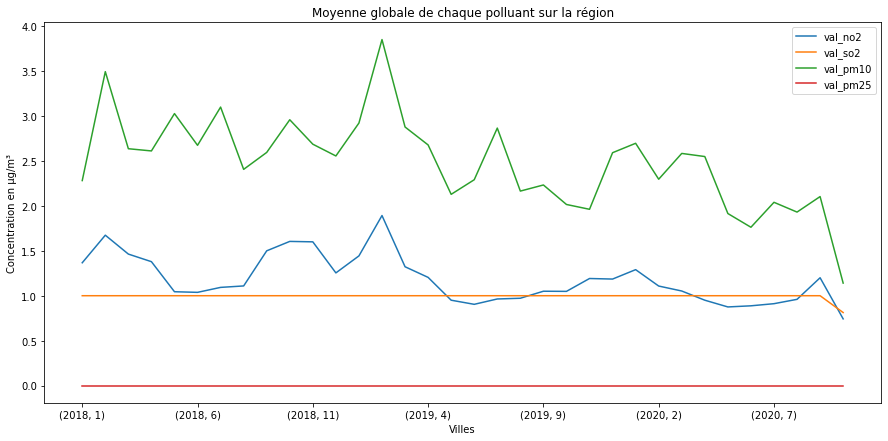

In [15]:
dfpm = dataParVille.groupby(by=['Year', 'Month']).mean()

listPolluants = ['val_no2','val_so2','val_pm10','val_pm25']

dfpm.plot(y=listPolluants, figsize= (15,7))

plt.title("Moyenne globale de chaque polluant sur la région")

axes = plt.gca()
axes.set_xlabel('Villes')
axes.set_ylabel('Concentration en µg/m³')


In [16]:
dataParVille['lib_zone'].unique()

array(['BLOIS', 'BOURGES', 'CHARTRES', 'CHATEAUROUX', 'DREUX',
       'MONTARGIS', 'ORLEANS', 'TOURS'], dtype=object)

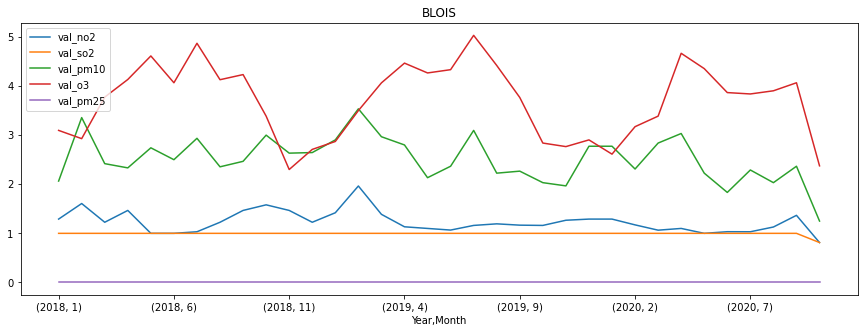

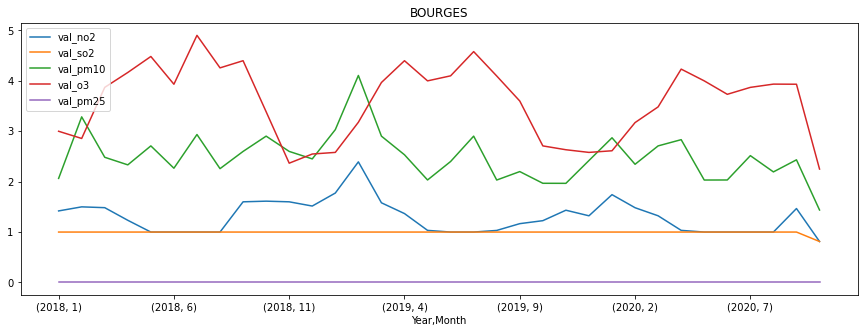

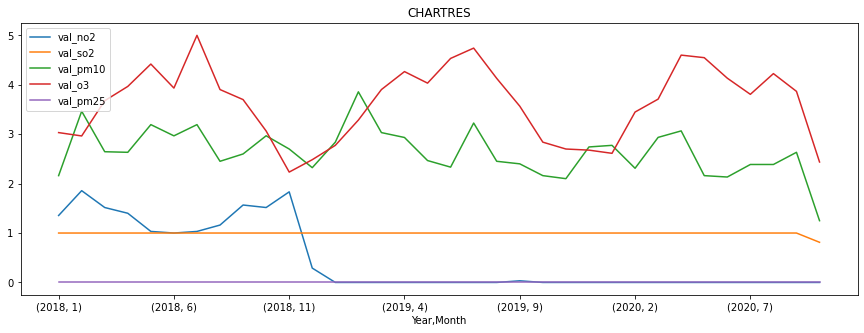

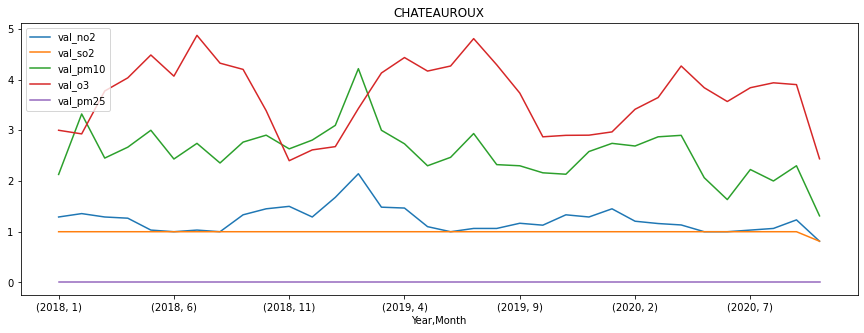

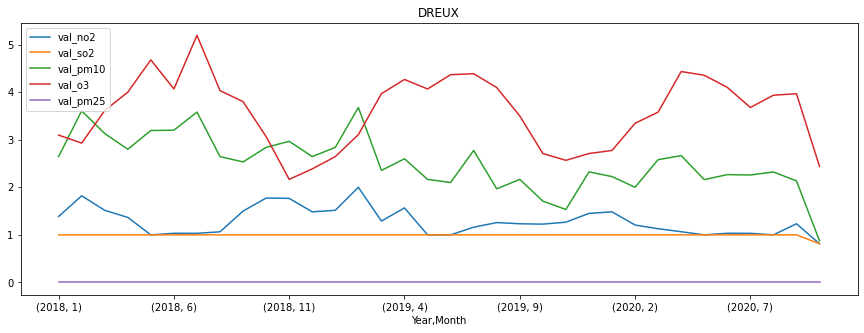

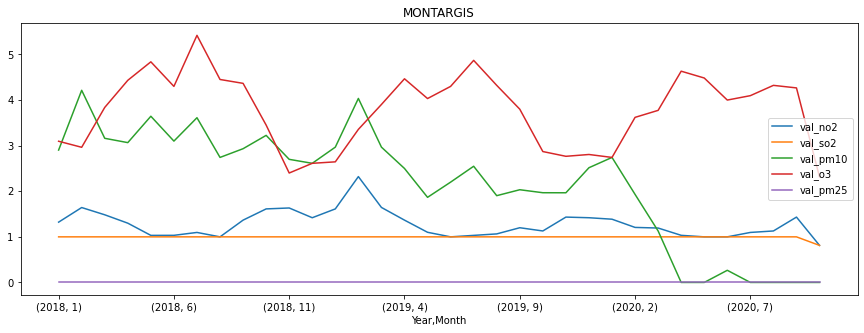

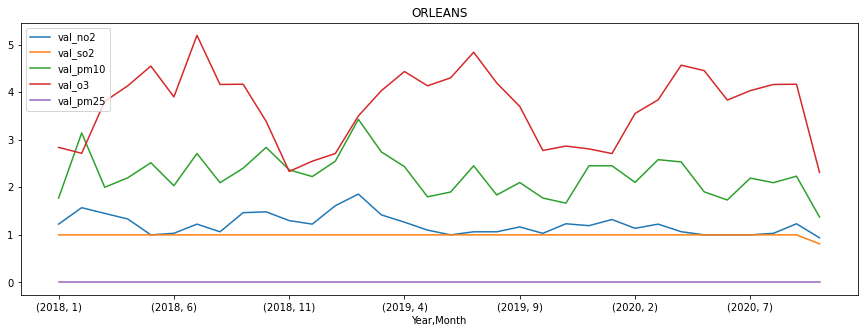

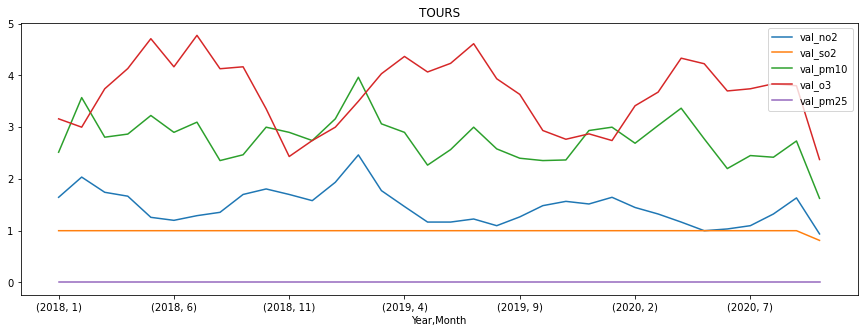

In [17]:
for i in dataParVille['lib_zone'].unique() :
    data2020 = dataParVille.iloc[np.where(dataParVille['lib_zone'] == i)[0], :]
    data2020 = data2020.groupby(by=['Year', 'Month']).mean()
    data2020.plot(y=['val_no2','val_so2','val_pm10','val_o3','val_pm25'], figsize= (15,5))
    plt.title(i);

# Pour l'année 2020

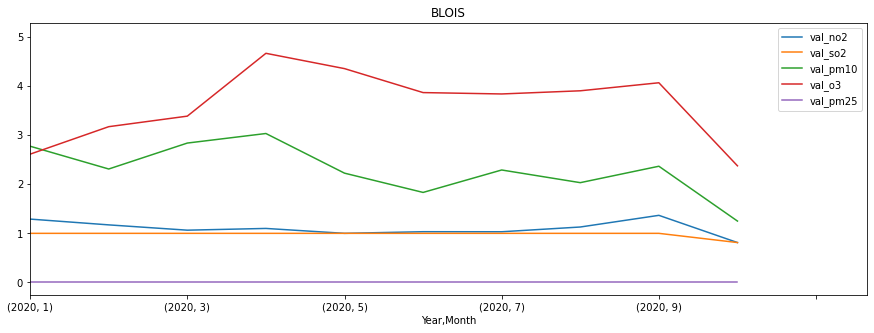

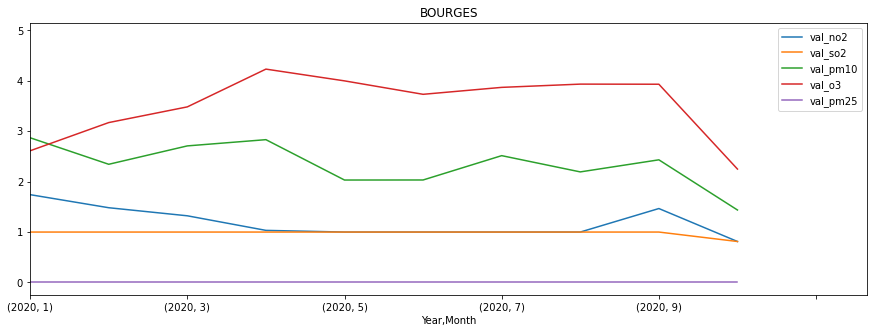

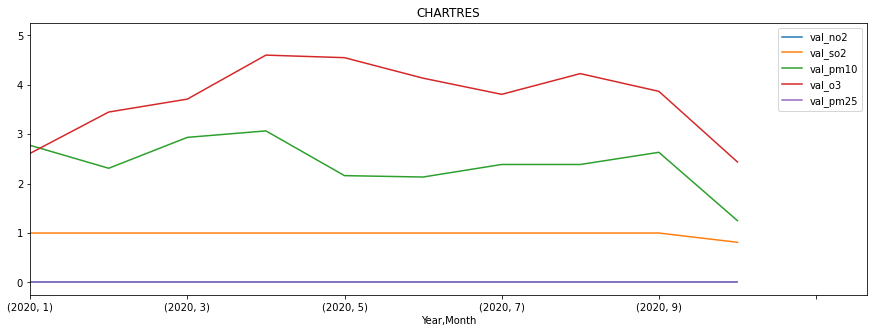

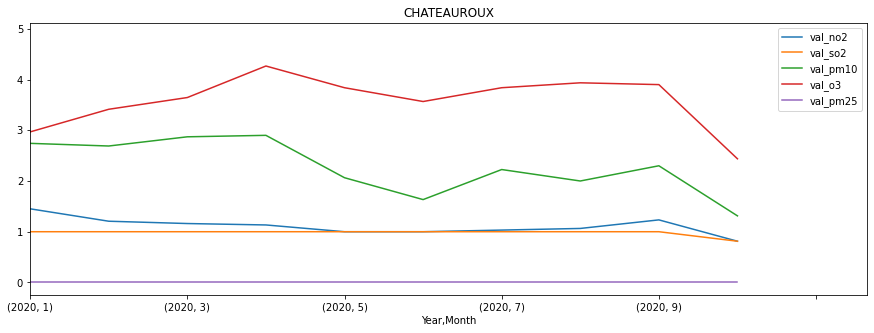

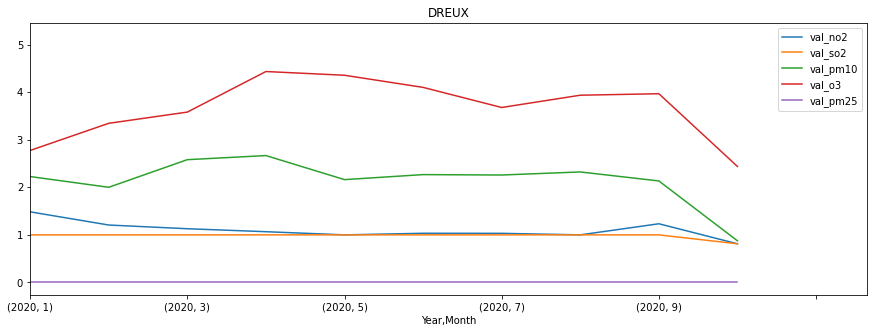

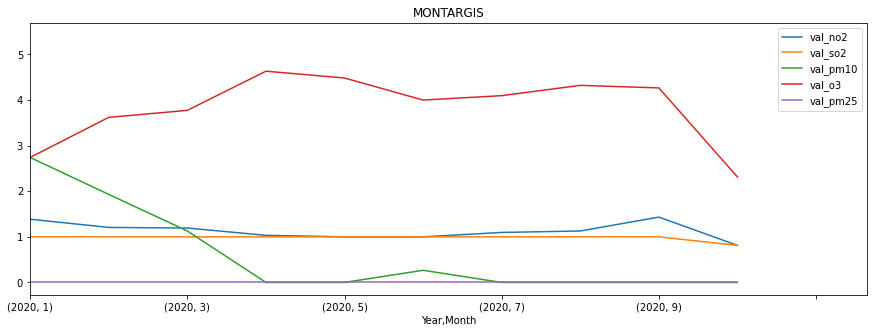

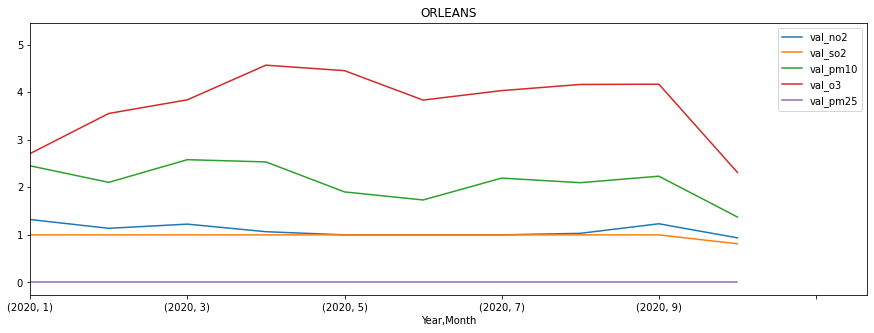

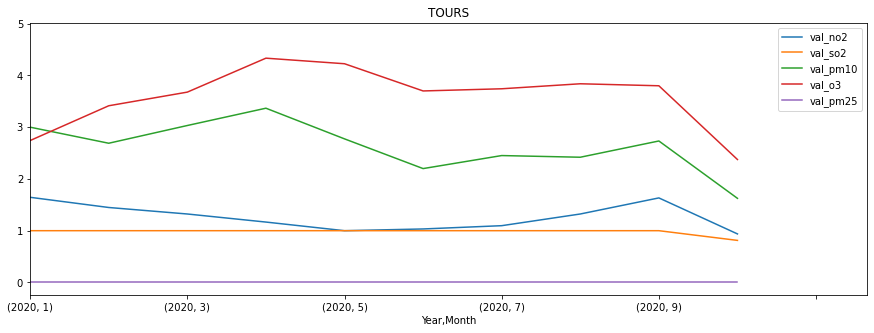

In [18]:
for i in dataParVille['lib_zone'].unique() :
    data2020 = dataParVille.iloc[np.where(dataParVille['lib_zone'] == i)[0], :]
    data2020 = data2020.groupby(by=['Year', 'Month']).mean()
    data2020.plot(y=['val_no2','val_so2','val_pm10','val_o3','val_pm25'], figsize= (15,5), xlim = 24)
    plt.title(i);

# Cartographie

In [29]:
import folium
import pandas as pd
from folium import IFrame

url = "https://opendata.arcgis.com/datasets/6f64bbd4f94c425791c2ec7eee33bb71_0.csv"

get_city_average = df.groupby(["lib_zone"]).mean().reset_index().round(decimals=2)
average = ['lib_zone','val_no2','val_so2','val_pm10','val_o3','val_pm25']
print(get_city_average[average])

map = folium.Map(location = [ 47.59, 1.322670], zoom_start = 8, tiles='Stamen Terrain').add_to(fig)

for lat, lon, name,qualif,valeur,val_no2,val_so2,val_pm10, in zip (get_city_average['Y'], get_city_average['X'], get_city_average["lib_zone"],df['qualif'], get_city_average["valeur"], get_city_average["val_no2"], get_city_average["val_so2"], get_city_average["val_pm10"],):
 
  folium.Circle(location = [lat, lon],  
                tooltip = str(str(name) + " <br> <font color=blue><strong>Air:</strong></font>"+ str(qualif) + "<br><font color=green><strong> Val:</strong></font>" + str(valeur)  + "<br> <font color=orange><strong> No2:</strong></font>" + str(val_no2) + "<br><font color=orange><strong> So2 :</strong></font>" + str(val_so2)+ "<br><font color=red><strong> Pm10 :</strong></font>" + str(val_pm10) ),
               
                radius=10000,
                legend_name = "koko",
                color='#3186cc',
                opacity=2,
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.3).add_to(map)    
map

      lib_zone  val_no2  val_so2  val_pm10  val_o3  val_pm25
0        BLOIS     1.24      1.0      2.53    3.72       0.0
1      BOURGES     1.30      1.0      2.50    3.60       0.0
2     CHARTRES     0.46      1.0      2.66    3.64       0.0
3  CHATEAUROUX     1.23      1.0      2.58    3.68       0.0
4        DREUX     1.29      1.0      2.53    3.61       0.0
5    MONTARGIS     1.28      1.0      2.18    3.80       0.0
6      ORLEANS     1.22      1.0      2.26    3.72       0.0
7        TOURS     1.47      1.0      2.79    3.68       0.0


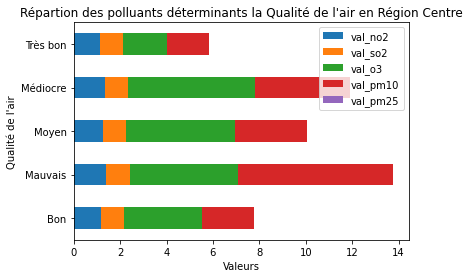

In [30]:
data = df.groupby(['qualif']).mean()[['val_no2', 'val_so2',"val_o3","val_pm10","val_pm25"]]

data.plot.barh(stacked=True)
plt.xlabel("Valeurs")
plt.ylabel("Qualité de l'air")
plt.title("Répartion des polluants déterminants la Qualité de l'air en Région Centre")

plt.show()